SVM Accuracy: 0.8431646567007375
KNN Accuracy: 0.793066164722362
Random Forest Accuracy: 0.8043019107443806


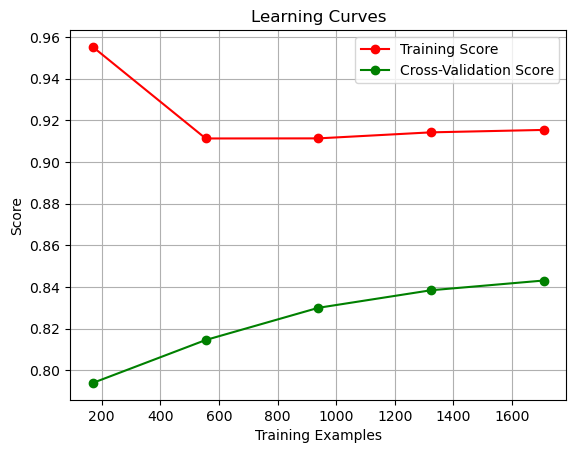

Subset of Predicted Images:


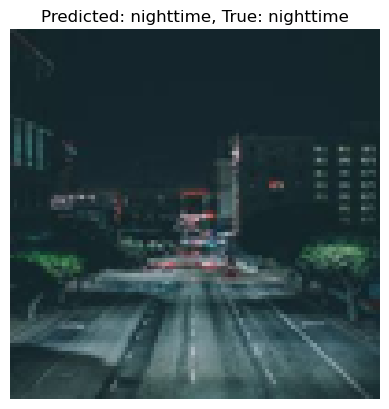

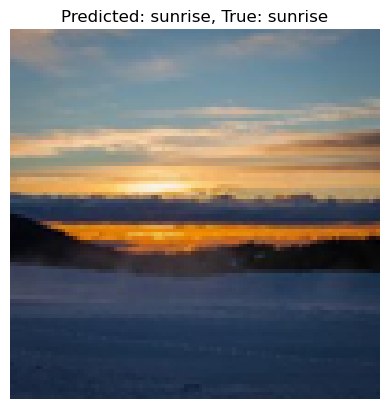

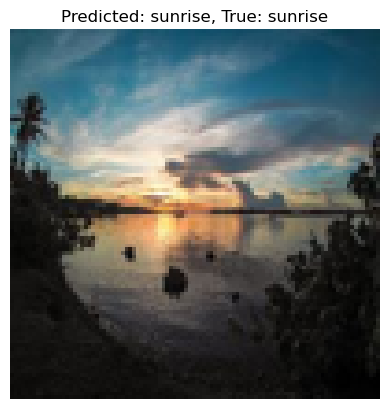

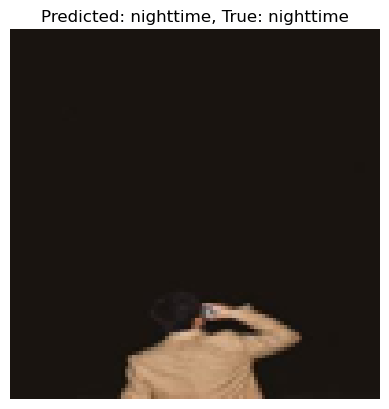

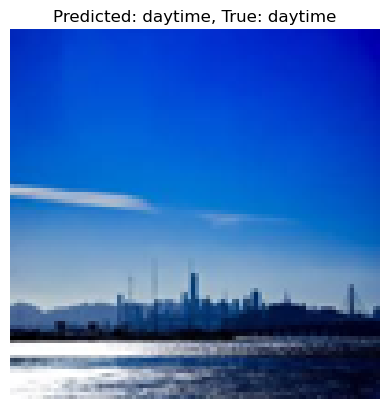

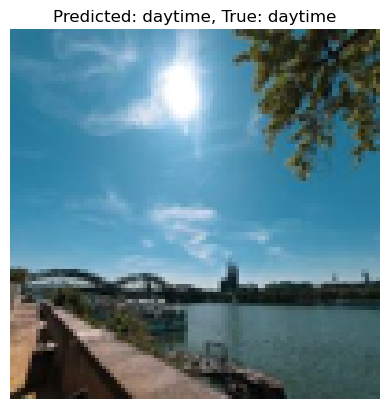

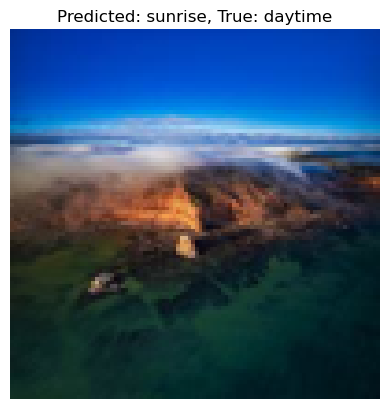

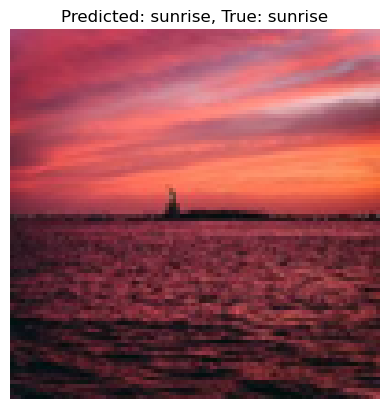

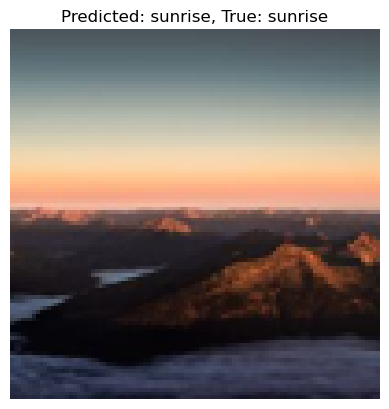

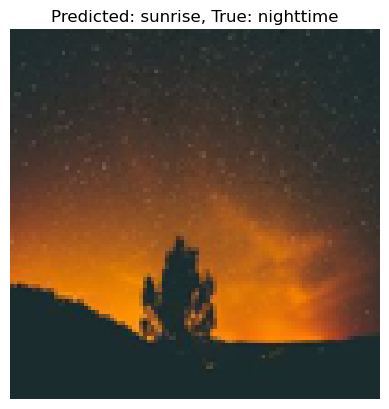

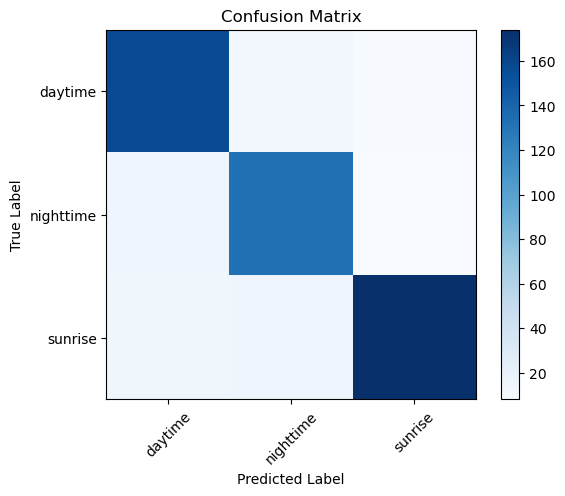

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Rest of your code...


from sklearn.model_selection import learning_curve


# Set the path to your image dataset directory
dataset_directory = '/kaggle/input/timeofdaydataset'

# Function to load and preprocess the images
def load_images(directory):
    X = []
    y = []
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        if os.path.isdir(category_dir):
            for filename in os.listdir(category_dir):
                if filename.endswith('.jpeg') or filename.endswith('.png'):  # Fix typo in the file extension
                    image_path = os.path.join(category_dir, filename)
                    image = Image.open(image_path)
                    image = image.resize((100, 100))  # Resize the image if needed
                    image = np.array(image)
                    X.append(image)
                    y.append(category)
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess the images
X, y = load_images(dataset_directory)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Train and evaluate three machine learning algorithms
svm = SVC()
svm_scores = cross_val_score(svm, X_train.reshape(X_train.shape[0], -1), y_train, cv=5)
svm_accuracy = np.mean(svm_scores)

knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train.reshape(X_train.shape[0], -1), y_train, cv=5)
knn_accuracy = np.mean(knn_scores)

rf = RandomForestClassifier(n_estimators=10)  # Increase the number of trees to 10
rf_scores = cross_val_score(rf, X_train.reshape(X_train.shape[0], -1), y_train, cv=5)
rf_accuracy = np.mean(rf_scores)

# Print the accuracies
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# Find the model with the highest accuracy
models = [svm, knn, rf]
accuracies = [svm_accuracy, knn_accuracy, rf_accuracy]
best_model_index = np.argmax(accuracies)
best_model = models[best_model_index]

# Train the best model
best_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Plot learning curves for the best model
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train.reshape(X_train.shape[0], -1), y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

# Print a subset of predicted images by the best model
subset_indices = np.random.choice(len(X_test), size=10, replace=False)
subset_images = X_test[subset_indices]
subset_predictions = best_model.predict(subset_images.reshape(subset_images.shape[0], -1))
subset_labels = label_encoder.inverse_transform(subset_predictions)
subset_true_labels = label_encoder.inverse_transform(y_test[subset_indices])

print("Subset of Predicted Images:")
for i in range(len(subset_images)):
    plt.figure()
    plt.imshow(subset_images[i])
    plt.title(f"Predicted: {subset_labels[i]}, True: {subset_true_labels[i]}")
    plt.axis('off')
    plt.show()

# Compute and display the confusion matrix for the best model
y_pred = best_model.predict(X_test.reshape(X_test.shape[0], -1))
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
